Coursework2 

Mình sẽ làm bài toán điểm danh trong công ty. Mọi người có video của các bạn đã quay, tùy ý xử lý. Sau đấy sẽ dự đoán với 1 ảnh mới xem ảnh đấy là bạn nào.  

Ý tưởng làm sẽ là: video -> ảnh -> face detection (cắt ra vùng chứa face: dlib, mtcnn, retinaface) -> dùng pre-trained model từ face sang feature -> có thể fine-tune hoặc feature extractor (SVM) để phân biệt xem mặt bạn nào.         

Dùng pre-trained model ra embedding, so sánh L2 (cosin) 2 vector xem có cùng 1 mặt không (Arcface).

Tham khảo:     
[https://github.com/deepinsight/insightface]
[https://github.com/serengil/deepface]
[https://github.com/davidsandberg/facenet]

Chấm điểm: Mình có 1 bộ testset, mỗi ảnh dự đoán đúng được 1 điểm, dự đoán sai bị trừ 0.5, dự đoán unknown không được điểm cũng không bị trừ điểm           
Deadline: 11h59 tối thứ ba 7/9. Dataset: 
https://drive.google.com/drive/folders/1qjquQQ8FkpzhrLNqcsS1Q_-6W9qNg3j4?fbclid=IwAR2yx5beOBjSJqxi_Togz5RSxdHJRbipfbcmbeUkQcq76XB-fWMiSlrBvX4

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install unidecode

     |████████████████████████████████| 235 kB 3.1 MB/s 


In [3]:
import os
import cv2
import time
from google.colab.patches import cv2_imshow
import unidecode

In [4]:
os.listdir("/content/drive/MyDrive/cw2/Video") 

['Tuấn.mp4',
 'Trường.mp4',
 'Linh.mp4',
 'Hiếu.mp4',
 'Quân.mp4',
 'Xuân Anh.mp4',
 'Tân.mp4',
 'Đức.mp4',
 'Kiên.mp4',
 'Việt Đức.mp4',
 'Hùng.mp4',
 'Thắng.mp4',
 'Vân.mp4',
 'HĐức.mp4']

In [5]:
files_dir = []
for root, directory, file in os.walk("/content/drive/MyDrive/cw2/Video"):
    for f in file:
        f_ = os.path.join(root, f)
        files_dir.append(f_)
print(files_dir)


for file in files_dir:
    f = file.split("/")
    name = f[-1].split(".")[0]
    name = unidecode.unidecode(name)
    print(name)

['/content/drive/MyDrive/cw2/Video/Tuấn.mp4', '/content/drive/MyDrive/cw2/Video/Trường.mp4', '/content/drive/MyDrive/cw2/Video/Linh.mp4', '/content/drive/MyDrive/cw2/Video/Hiếu.mp4', '/content/drive/MyDrive/cw2/Video/Quân.mp4', '/content/drive/MyDrive/cw2/Video/Xuân Anh.mp4', '/content/drive/MyDrive/cw2/Video/Tân.mp4', '/content/drive/MyDrive/cw2/Video/Đức.mp4', '/content/drive/MyDrive/cw2/Video/Kiên.mp4', '/content/drive/MyDrive/cw2/Video/Việt Đức.mp4', '/content/drive/MyDrive/cw2/Video/Hùng.mp4', '/content/drive/MyDrive/cw2/Video/Thắng.mp4', '/content/drive/MyDrive/cw2/Video/Vân.mp4', '/content/drive/MyDrive/cw2/Video/HĐức.mp4']
Tuan
Truong
Linh
Hieu
Quan
Xuan Anh
Tan
Duc
Kien
Viet Duc
Hung
Thang
Van
HDuc


In [8]:
step = 20
counts = []
output_loc = "/content/drive/MyDrive/cw2/Raw"
for label in files_dir:
    sub_output_loc = label.split("/")[-1].split(".")[0]
    sub_output_loc = unidecode.unidecode(sub_output_loc)
    output_loc_ = output_loc + "/" + sub_output_loc
    print(output_loc_)
    try:
        os.mkdir(output_loc_)
    except OSError:
        pass
    vidcap = cv2.VideoCapture(label)
    success, image = vidcap.read()
    count = 0
    while success:
        if count % step == 0:
            cv2.imwrite(output_loc_ + "/frame" + str(count//step) + ".jpg" , image)
        success, image = vidcap.read()
        count += 1
    counts.append(count)

/content/drive/MyDrive/cw2/Raw/Tuan
/content/drive/MyDrive/cw2/Raw/Truong
/content/drive/MyDrive/cw2/Raw/Linh
/content/drive/MyDrive/cw2/Raw/Hieu
/content/drive/MyDrive/cw2/Raw/Quan
/content/drive/MyDrive/cw2/Raw/Xuan Anh
/content/drive/MyDrive/cw2/Raw/Tan
/content/drive/MyDrive/cw2/Raw/Duc
/content/drive/MyDrive/cw2/Raw/Kien
/content/drive/MyDrive/cw2/Raw/Viet Duc
/content/drive/MyDrive/cw2/Raw/Hung
/content/drive/MyDrive/cw2/Raw/Thang
/content/drive/MyDrive/cw2/Raw/Van
/content/drive/MyDrive/cw2/Raw/HDuc


In [9]:
! pip install mtcnn

     |████████████████████████████████| 2.3 MB 2.7 MB/s 


In [32]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [33]:
from sklearn.datasets import load_files
import numpy as np

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)
16 (160, 160, 3)
17 (160, 160, 3)
18 (160, 160, 3)
19 (160, 160, 3)
20 (160, 160, 3)
21 (160, 160, 3)


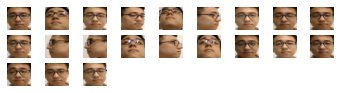

In [96]:
# demonstrate face detection on 5 Celebrity Faces Dataset
from os import listdir
from io import BytesIO
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# specify folder to plot
folder = '/content/drive/MyDrive/cw2/Train/Xuan Anh/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(8, 9, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()


In [82]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array



In [83]:
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        face = extract_face(path)
        # store
        faces.append(face)
    return faces

In [84]:
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		#
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

In [120]:
trainX, trainy = load_dataset('/content/drive/MyDrive/cw2/Train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/cw2/Val/')

>loaded 14 examples for class: Kien
>loaded 13 examples for class: Thang
>loaded 17 examples for class: Linh
>loaded 20 examples for class: Hung
>loaded 22 examples for class: Van
>loaded 28 examples for class: Duc
>loaded 8 examples for class: Quan
>loaded 14 examples for class: Tuan
>loaded 21 examples for class: Xuan Anh
>loaded 25 examples for class: Hieu
>loaded 17 examples for class: Truong
>loaded 9 examples for class: HDuc
>loaded 16 examples for class: Tan
>loaded 23 examples for class: Viet Duc
(247, 160, 160, 3) (247,)
>loaded 1 examples for class: Kien
>loaded 1 examples for class: Thang
>loaded 1 examples for class: Linh
>loaded 1 examples for class: Hung
>loaded 1 examples for class: Van
>loaded 1 examples for class: Duc
>loaded 1 examples for class: Quan
>loaded 1 examples for class: Tuan
>loaded 1 examples for class: Xuan Anh
>loaded 1 examples for class: Hieu
>loaded 1 examples for class: Truong
>loaded 1 examples for class: HDuc
>loaded 1 examples for class: Tan
>load

In [121]:
savez_compressed('faces-dataset.npz', trainX, trainy, testX, testy)

In [122]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model = load_model('/content/drive/MyDrive/cw2/Models/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (247, 160, 160, 3) (247,) (14, 160, 160, 3) (14,)
Loaded Model
(247, 128)
(14, 128)


In [123]:
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=247, test=14


In [124]:

from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=247, test=14
Accuracy: train=99.595, test=100.000


Predicted: Xuan Anh (77.168)
Expected: Xuan Anh


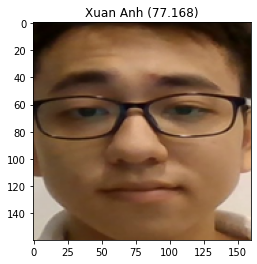

In [125]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()